In [1]:
# m_j = m_2
# m_i = m_1  and m_2< equal to m_1.

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
from matplotlib import rcParams



plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})    


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
t_m = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr

σ_eq = 0.005
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3



# Merger rate of  PBH binaries without and with halos for PBHs mass range of 5 M☉-100 M☉ .
# As per LIGO/VIRGO/KAGRA limits having merger rates of BBHs in range m_1 = [5, 100] M☉
# and m_2 = [5, 100] M☉, the updated merger rates as per the third run are 
# R_12 = (17.9 - 44) Gpc⁻3 yr⁻1. So, in the calculations of the merger rate 
# we shall be using f_pbh and hence f at R_12 = 44 Gpc⁻3 yr⁻1 so that we don't 
# exceed the upper limit of the merger rate as per 3rd run of LIGO/VIRGO/KAGRA.


# Product of the probability distribution of the final merger time  and X of PBH binaries 
# without and with halos for PBHs mass range of m_min M☉ - m_max M☉ .
        
def P_X_tm_nohalos(m_1, m_2, Δ_1, Δ_2, t_m, X, f): 
    
    if  m_1 < m_min: 
        return 0
    
    elif m_2 < m_min:
        return 0
    
    elif m_1 < m_2:
        return 0
    
    else: 
    
        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1) + f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X):   #λ_0
            return  X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))


        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                                 # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))


        # Merger rate of  PBH binaries without halos for PBHs mass range of 1e-3 M☉ - 100 M☉ .


        k = 22.3819
        A = ((ρ_eq**(4/3))*(G**3)*(k**7))/(c**5)

        def B_nohalo(m_1,m_2,Δ_1,Δ_2):
            return (A**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))



        def γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X):        #eq.(12) in the notes.
            return (((1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))**(-1/14))/(1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))) *  B_nohalo(m_1,m_2,Δ_1,Δ_2) * (X**(-37/21))




        return (1/(7 * t_m))  * ((γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2) / ((1 + (γ_X_nohalo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(-((4*π)/3)  * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T * X) 





In [2]:
m_1 = 7   #in units of M☉
m_2 = 9    #in units of M☉

y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)

m_1 = [7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87] M☉

Δ_1 = [ 1.76383421  2.26778684  2.91572593  3.74879049  4.81987348  6.19698019
  7.96754596 10.24398767 13.17084129 16.9339388  21.77220702]


In [3]:
# Choosing the range of PBH mass function from m_min = 5 M☉ - 100 M☉.

m_1 = m_1_list[3]           # in units of M☉

Δ_1 = Δ_1_list[3]      

m_2 = m_1_list[0]             # in units of M☉
 
Δ_2 = Δ_1_list[0]     

m_min = 5     #in units of M☉
m_max = 100   #in units of M☉

X_min = 1e-10
X_max = 1e5

X = np.geomspace(X_min, X_max, 1000000) # for the PBH mass range of 5 - 100 solar mass.

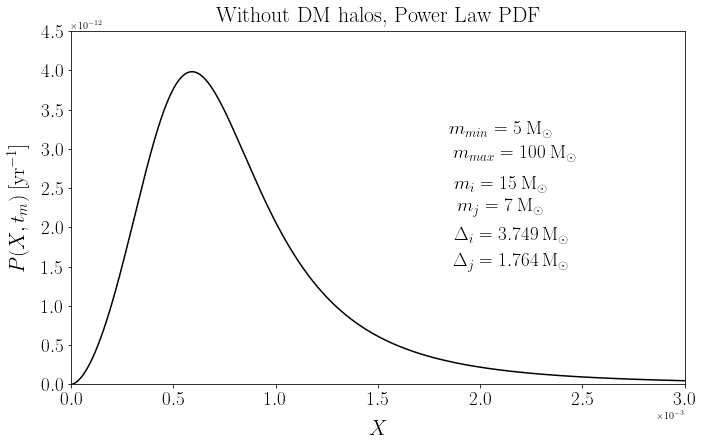

In [4]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 5 M☉ - 100 M☉.


plt.figure(figsize = (11, 6.5))


f_pbh= 3.19e-3
f = 0.85 * f_pbh
     
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 5     #in units of M☉, for PBHs mass range of 5 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    

plt.plot(X, P_X_tm_nohalos(m_1, m_2, Δ_1, Δ_2, t_m, X, f ), 'k')



plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,-3))



plt.text(2.1e-3, 3.25e-12, "$m_{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.17e-3, 2.95e-12, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(2.1e-3, 2.55e-12, "$m_{i} = 15 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(2.1e-3, 2.25e-12, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(2.15e-3, 1.90e-12, "$\Delta_{i} = 3.749 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(2.15e-3, 1.55e-12, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")




plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlim(0, 3e-3)
plt.ylim(0, 4.5e-12)



plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
#plt.legend(["With DM halos","Without DM halos"], prop = {'size':18}, facecolor = 'white', fontsize=110)
plt.title('Without DM halos, Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('1PWRP_X_t_mvsXnoDM.pdf', bbox_inches = 'tight')
plt.show() 

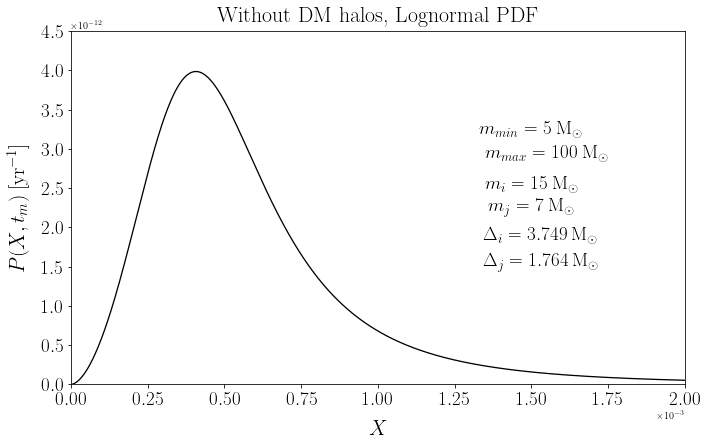

In [5]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 5 M☉ - 100 M☉.

plt.figure(figsize = (11, 6.5))

  
f_pbh= 2.23e-3
f = 0.85 * f_pbh
     

        
def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 5 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))



plt.plot(X, P_X_tm_nohalos(m_1, m_2, Δ_1, Δ_2, t_m, X, f), 'k' )


plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,-3))

plt.text(1.5e-3, 3.25e-12, "$m_{min} = 5 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(1.55e-3, 2.95e-12, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(1.5e-3, 2.55e-12, "$m_{i} = 15 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(1.5e-3, 2.25e-12, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(1.53e-3, 1.90e-12, "$\Delta_{i} = 3.749 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(1.53e-3, 1.55e-12, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")



plt.xlim(0, 2e-3)
plt.ylim(0, 4.5e-12)


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
#plt.legend(["With DM halos","Without DM halos"], prop = {'size':18}, facecolor = 'white', fontsize=110)
plt.title('Without DM halos, Lognormal PDF', fontsize = 22, pad = 9)
plt.savefig('1LgnmlP_X_t_mvsXnoDM.pdf', bbox_inches = 'tight')
plt.show() 

In [6]:
# Choosing the range of PBH mass function from m_min = 1e-3 M☉ - 100 M☉.
# Keeping all these values same.


m_1 = m_1_list[3]           # in units of M☉

Δ_1 = Δ_1_list[3]      

m_2 = m_1_list[0]             # in units of M☉
 
Δ_2 = Δ_1_list[0]     

m_min = 1e-3  #in units of M☉
m_max = 100   #in units of M☉

X_min = 1e-9
X_max = 1e5
X = np.geomspace(X_min, X_max, 1000000) # for the PBH mass range of 1e-3 - 100 solar mass.

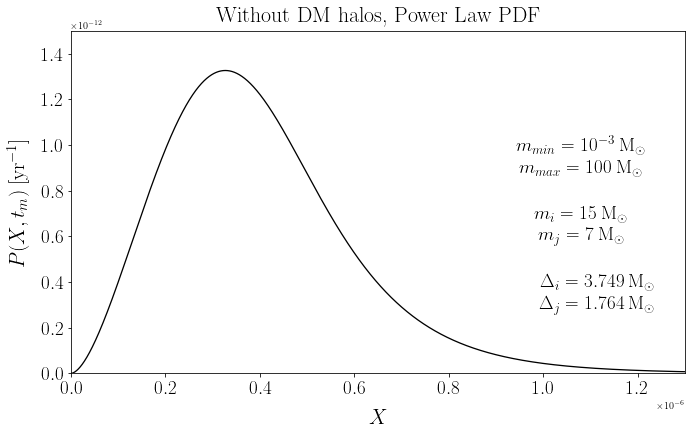

In [7]:
# P(X, t_m) in range of Power Law PBH mass function from m_min = 1e-3 M☉ - 100 M☉.


plt.figure(figsize = (11, 6.3))


f_pbh= 3.62e-4
f = 0.85 * f_pbh
     
        
          
def P(m): #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-3     #in units of M☉, for PBHs mass range of 1e-3 M☉-100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))
    
    
    
plt.plot(X, P_X_tm_nohalos(m_1, m_2, Δ_1, Δ_2, t_m, X, f), 'k')


#plt.ticklabel_format(axis='x', style='sci', scilimits=(-6,-6))



plt.text(1.08e-6, 1e-12, "$m_{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(1.08e-6, 0.9e-12, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(1.08e-6, 0.7e-12, "$m_{i} = 15 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(1.08e-6, 0.6e-12, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(1.115e-6, 0.4e-12, "$\Delta_{i} = 3.749 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(1.115e-6, 0.3e-12, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")



plt.xlim(0, 1.3e-6)
plt.ylim(0, 1.5e-12)


plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
#plt.legend(["With DM halos","Without DM halos"],prop = {'size':18}, facecolor = 'white', fontsize=110)
plt.title('Without DM halos, Power Law PDF' , fontsize = 22, pad = 9)
plt.savefig('2PWRP_X_t_mvsXnoDM.pdf', bbox_inches = 'tight')
plt.show()

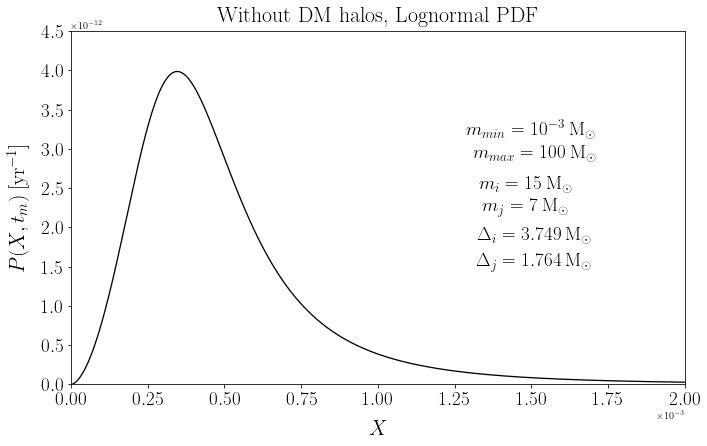

In [8]:
# P(X, t_m) in range of Lognormal PBH mass function from m_min = 1e-3 M☉ - 100 M☉.


plt.figure(figsize = (11, 6.5))

   
f_pbh= 1.88e-3
f = 0.85 * f_pbh
     
        
          
def P(m):      #Log-Normal PBH mass Distribution
    σ = 0.6
    m_c = 15   #in units of M☉, range of m_min = 1e-3 M☉ - m_max = 100 M☉ .
    return  (1/(σ * m * np.sqrt(2*π))) * np.exp(-((np.log(m/m_c))**2)/(2*(σ**2)))



plt.plot(X, P_X_tm_nohalos(m_1, m_2, Δ_1, Δ_2, t_m, X, f), 'k')


plt.ticklabel_format(axis='x', style='sci', scilimits=(-3,-3))

plt.text(1.5e-3, 3.25e-12, "$m_{min} = 10^{-3} \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(1.51e-3, 2.95e-12, "$m_{max} = 100 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")


plt.text(1.48e-3, 2.55e-12, "$m_{i} = 15 \: \mathrm{M_{\odot}}$", size = 19,
       ha="center", va="center")
plt.text(1.48e-3, 2.25e-12, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")

plt.text(1.51e-3, 1.90e-12, "$\Delta_{i} = 3.749 \: \mathrm{M_{\odot}}$", size = 19,
         ha="center", va="center")
plt.text(1.51e-3, 1.55e-12, "$\Delta_{j} = 1.764 \: \mathrm{M_{\odot}}$", size = 19,
        ha="center", va="center")




plt.xlim(0, 2e-3)
plt.ylim(0, 4.5e-12)


plt.rc('lines', linewidth = 1.3)    
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)
plt.xlabel('$X$', fontsize = 21, labelpad = 12)
plt.ylabel('$P(X, t_{m}) \: [\mathrm{yr^{-1}}]$', fontsize = 21, labelpad = 12)
#plt.legend(["With DM halos","Without DM halos"],prop = {'size':18}, facecolor = 'white', fontsize=110)
plt.title('Without DM halos, Lognormal PDF' , fontsize = 22, pad = 9)
plt.savefig('2LgnmlP_X_t_mvsXnoDM.pdf', bbox_inches = 'tight')
plt.show()